### On étudie la description concaténée avec le nom du produit + les catégories en label.

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import re
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix

from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score

import seaborn as sns


import time

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

nltk.download("punkt")
nltk.download("stopwords")
nltk.download('popular')

import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\linae\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\linae\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\linae\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\linae\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\linae\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\linae\AppData\Roaming\nltk

In [2]:
raw = pd.read_csv('flipkart_com-ecommerce_sample_1050.csv')
raw['text']=raw['product_name']+raw['description']

In [3]:
labels = raw['product_category_tree'].apply(lambda x: x.split('>>')[0].split('"')[1])

In [19]:
def plot_comparatif(array) :
    
    tsne = TSNE(n_components=2)
    X_tsne = tsne.fit_transform(array)
    
    print(X_tsne)

    categories = set(labels)
    cat_to_num = {cat: i for i, cat in enumerate(categories)}
    labels_reel = np.array([cat_to_num[cat] for cat in labels])

    model= KMeans(n_clusters=7,n_init=10)
    labels_cluster = model.fit_predict(X_tsne)
    
    print(labels_cluster)

    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels_reel)
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), bbox_to_anchor=(1,0) ,title="Categorie")
    plt.title('Représentation des articles par catégories réelles')

    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels_cluster)
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels_cluster), bbox_to_anchor=(1,0) , title="Clusters")
    plt.title('Représentation des articles par cluster')

    plt.show()

    print("ARI : " + str(adjusted_rand_score(labels_reel, labels_cluster)))

    matrix = confusion_matrix(labels_reel, labels_cluster, labels = range(7))
    df = pd.DataFrame(matrix, index = list(set(labels)), columns = range(7))
    
    plt.figure(figsize=(15,10))
    sns.heatmap(df,annot=True)

## Préparation des textes (Lemmatisation, stemming, stop words)

In [20]:
print(raw['text'][1]+'\n')

raw['text'] = raw['text'].str.lower()

print(raw['text'][1]+'\n')

raw['text'] = raw.apply(lambda row: re.sub('[^\w\s]', "", row['text']), axis=1)

print(raw['text'][1]+'\n')

raw['text'] = raw.apply(lambda row: re.sub('[0-9]', "", row['text']), axis=1)

print(raw['text'][1]+'\n')

raw['text_clean'] = raw.apply(lambda row : word_tokenize(row['text']), axis=1)

print(raw['text_clean'][1])
print('\n')

stop_words = set(stopwords.words('English'))
raw['text_clean'] = raw.apply(lambda row: [w for w in row['text_clean'] if not w in stop_words], axis=1)

print(raw['text_clean'][1])
print('\n')

raw['text_clean'] = raw['text_clean'].apply(lambda k: [WordNetLemmatizer().lemmatize(j) for j in k] )

print(raw['text_clean'][1])
print('\n')

sathiyas cotton bath towelspecifications of sathiyas cotton bath towel  bath towel red yellow blue bath towel features machine washable yes material cotton design self design general brand sathiyas type bath towel gsm  model name sathiyas cotton bath towel ideal for men women boys girls model id asvtwl color red yellow blue size mediam dimensions length  inch width  inch in the box number of contents in sales package  sales package  bath towel

sathiyas cotton bath towelspecifications of sathiyas cotton bath towel  bath towel red yellow blue bath towel features machine washable yes material cotton design self design general brand sathiyas type bath towel gsm  model name sathiyas cotton bath towel ideal for men women boys girls model id asvtwl color red yellow blue size mediam dimensions length  inch width  inch in the box number of contents in sales package  sales package  bath towel

sathiyas cotton bath towelspecifications of sathiyas cotton bath towel  bath towel red yellow blue bat

# bag of words comptage simple

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words="english")
X = vectorizer.fit_transform(raw['text'])
df = pd.DataFrame(X.toarray(),columns = vectorizer.get_feature_names_out())
df

,aa,aaa,aapno,aari,aarika,abilities,ability,abkl_grn_grn_grn,abkl_grn_grn_grnkey,abkl_pl_pl_pnk,...,zinc,zingalalaa,zip,zipexterior,zipper,zippered,zone,zoom,zora,zyxel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df.values.max()

22

In [23]:
df.stack().index[np.argmax(df.values)]

(639, 'laptop')

In [24]:
raw['text'][639]

'sunlast  inch laptop backpackkey features of sunlast  inch laptop backpack laptop backpack with solar panel comfortable back panel with airflow design adjustable sternum strap large outer elasticated mesh side pocket and a top carry handle padded and adjustable shoulder straps charge your mobile by solar power mobile power backup option long life easy to usesunlast  inch laptop backpack yellow price rs  the sunlast new laptop backpack with solar panel ensures complete safety to your laptop with its highquality built and wide range of builtin features with the inside of this bag featuring a protective padding you can be rest assured that the laptop inside it will be well cushioned from any accidental damage caused when you bump into any surface as it is made of nylon this laptop backpack can withstand abrasions and is long lasting this sunlast backpack comes with a unique solar panel which allows you to charge your mobile phone anywhere anytime this sunlast laptop backpack with solar p

In [25]:
df

,aa,aaa,aapno,aari,aarika,abilities,ability,abkl_grn_grn_grn,abkl_grn_grn_grnkey,abkl_pl_pl_pnk,...,zinc,zingalalaa,zip,zipexterior,zipper,zippered,zone,zoom,zora,zyxel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


[[-18.694626  -19.666695 ]
 [ 12.816264  -19.751902 ]
 [ 15.65151   -17.569592 ]
 ...
 [  1.0441022  13.8867655]
 [  2.9929597  16.033995 ]
 [  1.937522   13.795154 ]]
[3 0 0 ... 1 1 1]


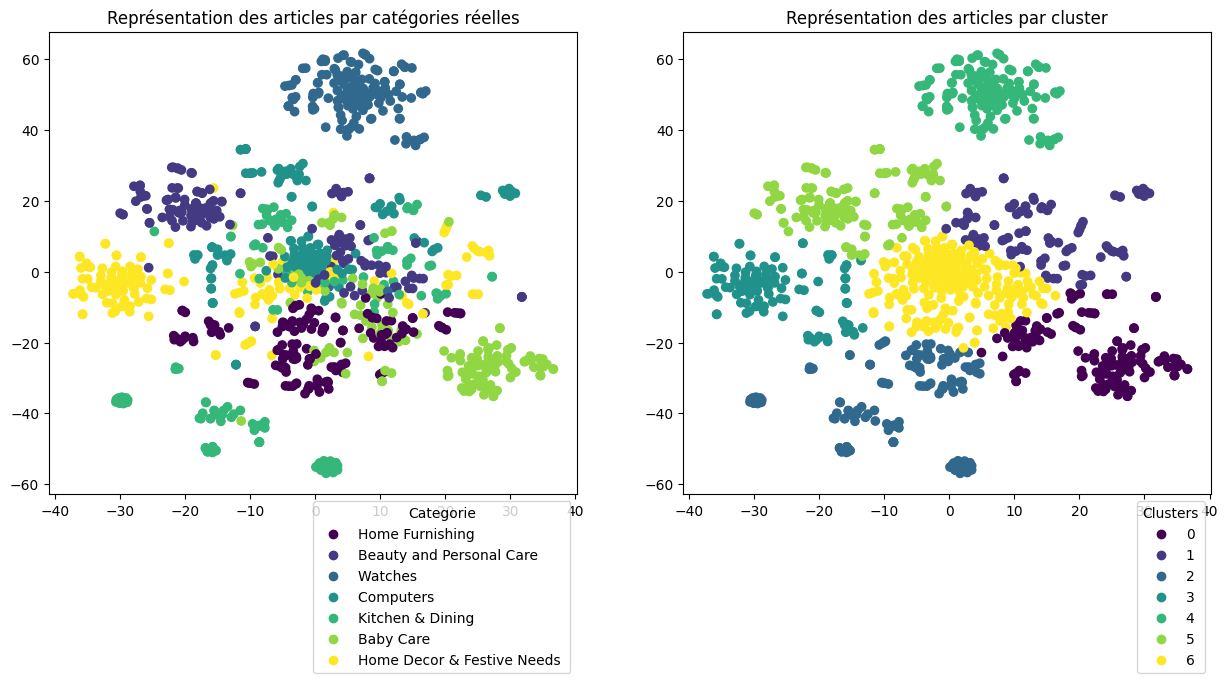

ARI : 0.33396607170267245


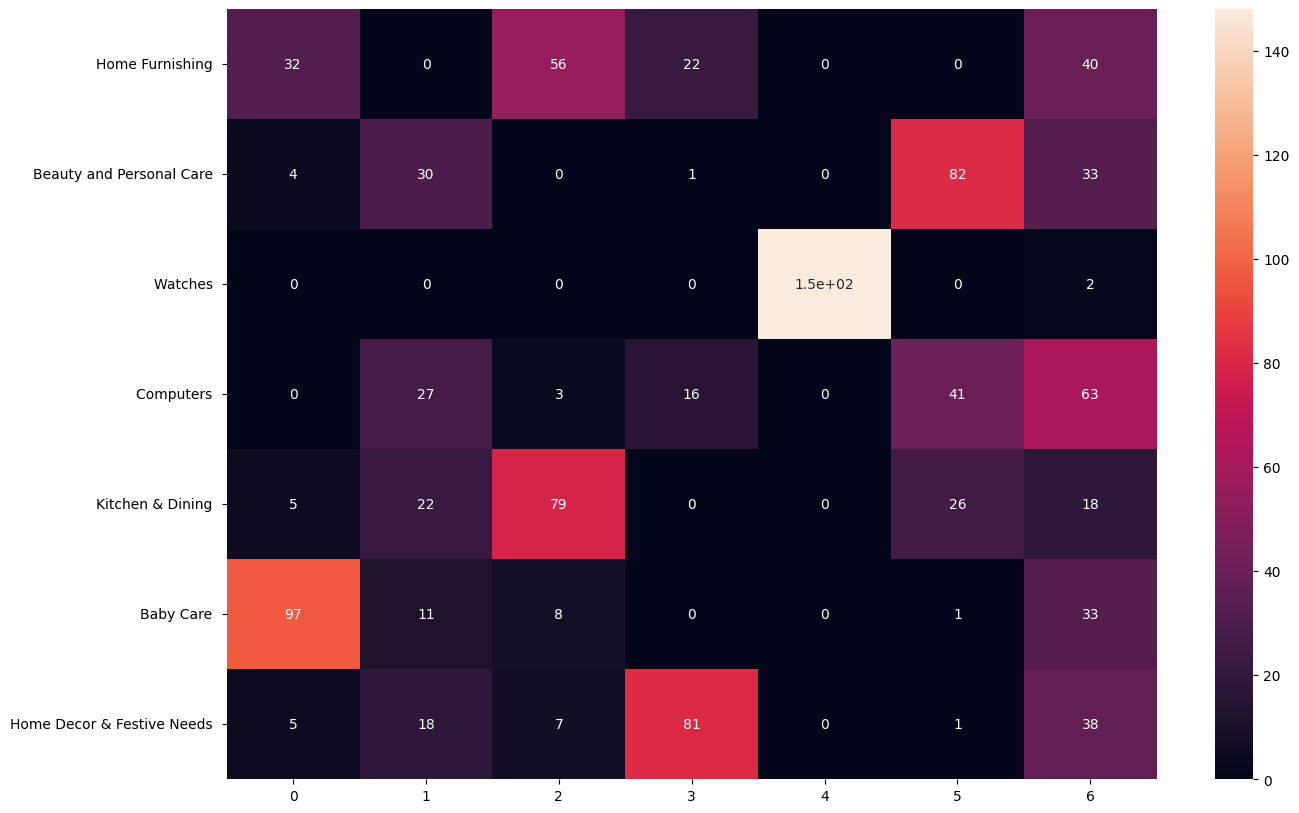

In [26]:
plot_comparatif(df)

# TFIDF

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(raw['text'])
df = pd.DataFrame(X.toarray(),columns = vectorizer.get_feature_names_out())
df

,aa,aaa,aapno,aari,aarika,abilities,ability,abkl_grn_grn_grn,abkl_grn_grn_grnkey,abkl_pl_pl_pnk,...,zinc,zingalalaa,zip,zipexterior,zipper,zippered,zone,zoom,zora,zyxel
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df.values.max()

0.8868732100518119

In [13]:
df.stack().index[np.argmax(df.values)]

(503, 'smj')

In [14]:
raw['text'][503]

'sonata smj watchsonata smj watch  buy sonata smj watch  smj online at rs in india only at flipkartcom  great discounts only genuine products  day replacement guarantee free shipping cash on delivery'

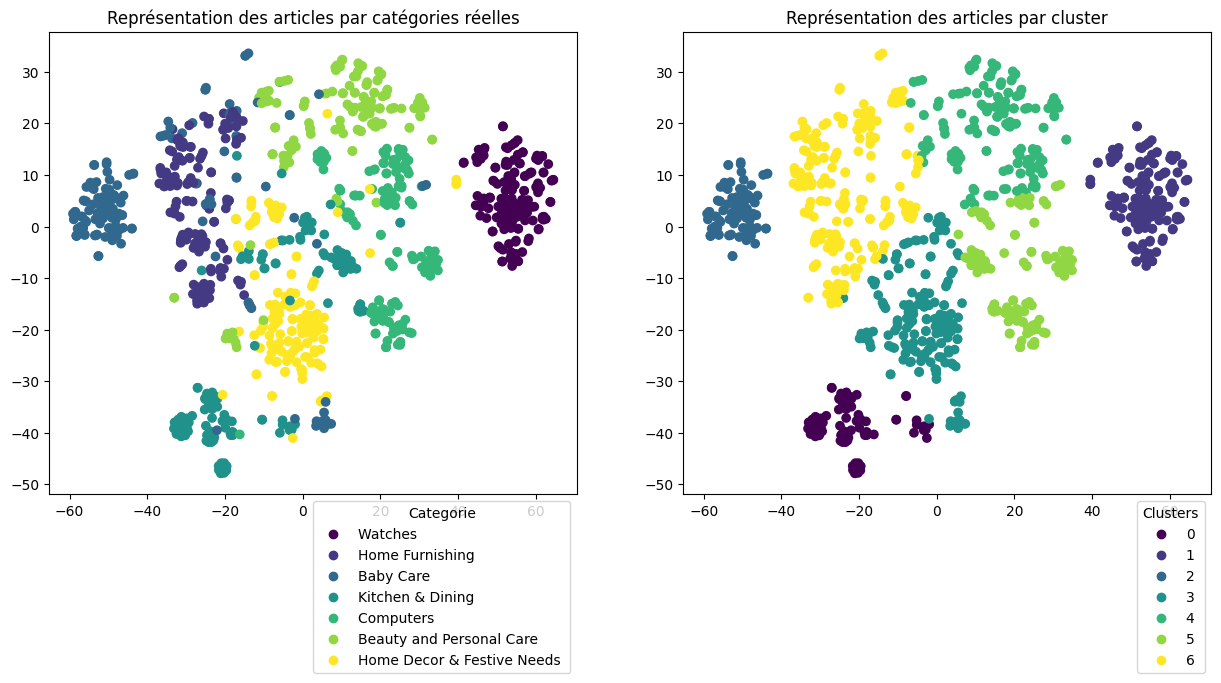

ARI : 0.5435243614482069


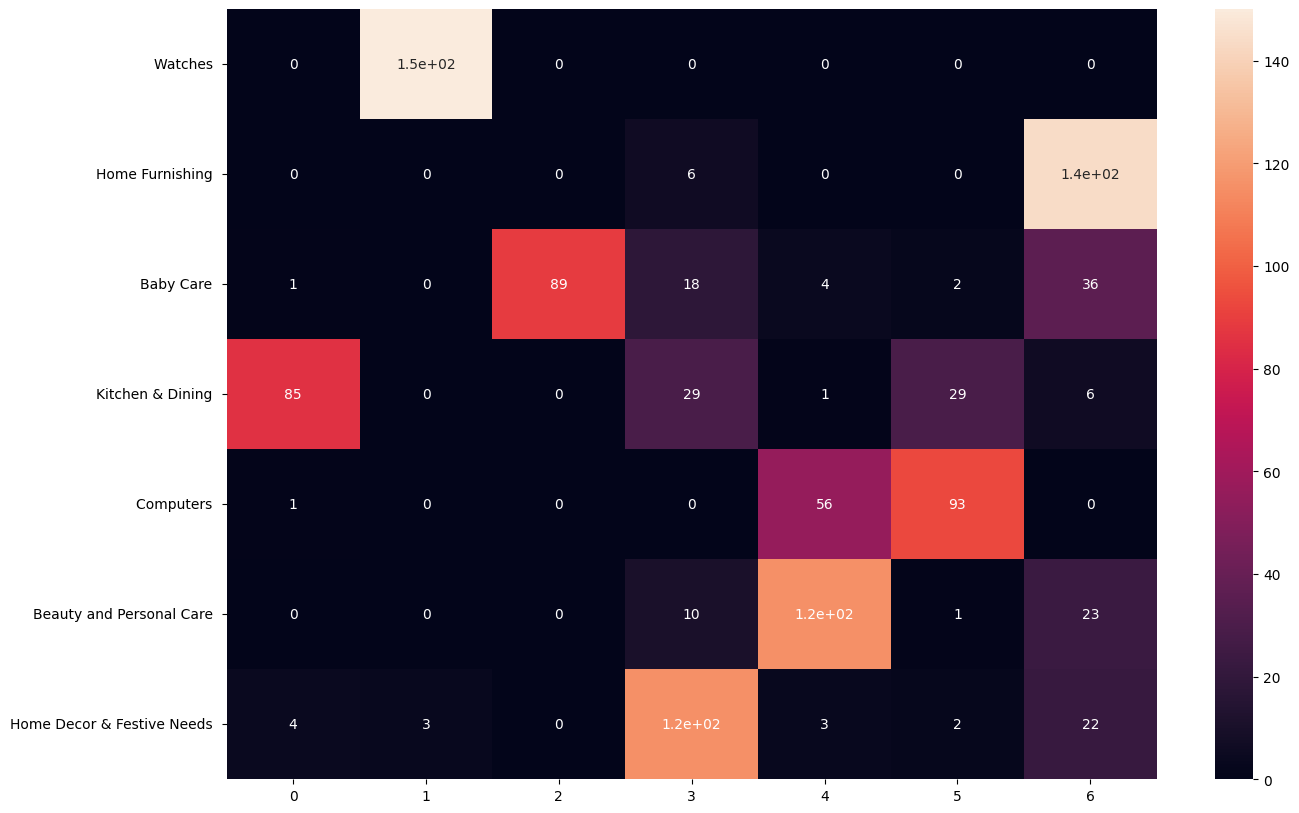

In [15]:
plot_comparatif(df)

# Word2vec

In [16]:
sentences = raw['text_clean'].to_list()

In [17]:
w2v_model = gensim.models.Word2Vec()
w2v_model.build_vocab(sentences)
w2v_model.train(sentences,total_examples=w2v_model.corpus_count,epochs=100)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Vocabulary size: 1673
Word2Vec trained


In [18]:
w2v_model.wv.most_similar("bath")

[('towel', 0.6012238264083862),
 ('towelbuy', 0.5961872935295105),
 ('loop', 0.5075576901435852),
 ('shower', 0.4601825475692749),
 ('sponge', 0.44521626830101013),
 ('luxury', 0.4336676597595215),
 ('mat', 0.42622193694114685),
 ('terry', 0.41830697655677795),
 ('towelsbuy', 0.4137117266654968),
 ('offering', 0.4040336608886719)]

In [19]:
w2v_model.wv.most_similar("laptop")

[('mouse', 0.5249667167663574),
 ('pad', 0.5137933492660522),
 ('max', 0.4785093367099762),
 ('mary', 0.47352924942970276),
 ('pro', 0.4474634826183319),
 ('pavilion', 0.4460834264755249),
 ('power', 0.4398662745952606),
 ('mbxa', 0.4306536614894867),
 ('compatible', 0.42028912901878357),
 ('malla', 0.4042562246322632)]

In [20]:
w2v_model.wv.most_similar("woman")

[('men', 0.6916342973709106),
 ('tm', 0.587272047996521),
 ('analog', 0.5770878195762634),
 ('lmli', 0.5641134977340698),
 ('lpln', 0.558387041091919),
 ('attivo', 0.5374479293823242),
 ('flippd', 0.53428053855896),
 ('maximum', 0.5317749977111816),
 ('fluid', 0.5308638215065002),
 ('plo', 0.5241391062736511)]

In [21]:
w2v_model.wv[1672].shape

(100,)

In [22]:
print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences)) 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 5597


In [23]:
print("Create Embedding matrix ...")
w2v_size = 100
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  0.299
Embedding matrix: (5597, 100)


In [24]:
input=Input(shape=(len(x_sentences),371),dtype='float64')
word_input=Input(shape=(371,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=371)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 371)]             0         
                                                                 
 embedding (Embedding)       (None, 371, 100)          559700    
                                                                 
 global_average_pooling1d (G  (None, 100)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 559,700
Trainable params: 559,700
Non-trainable params: 0
_________________________________________________________________


In [25]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

33/33 [==============================] - 0s 3ms/step


(1050, 100)

In [26]:
embeddings

array([[-0.1829822 , -0.12790719,  0.09791762, ..., -0.32764232,
         0.19185951,  0.05681014],
       [-0.05246023, -0.01876726, -0.12122668, ..., -0.05956719,
        -0.0675752 ,  0.13097678],
       [-0.3122559 , -0.03016588, -0.16754724, ...,  0.0499233 ,
        -0.06403901,  0.17876019],
       ...,
       [-0.02902456, -0.03930346,  0.01672831, ..., -0.0759096 ,
         0.05472521,  0.00285728],
       [-0.0797141 , -0.05460798,  0.04625314, ..., -0.09135316,
         0.07494257,  0.02567784],
       [-0.040227  , -0.03936783,  0.02012547, ..., -0.06844626,
         0.05619163,  0.00869028]], dtype=float32)

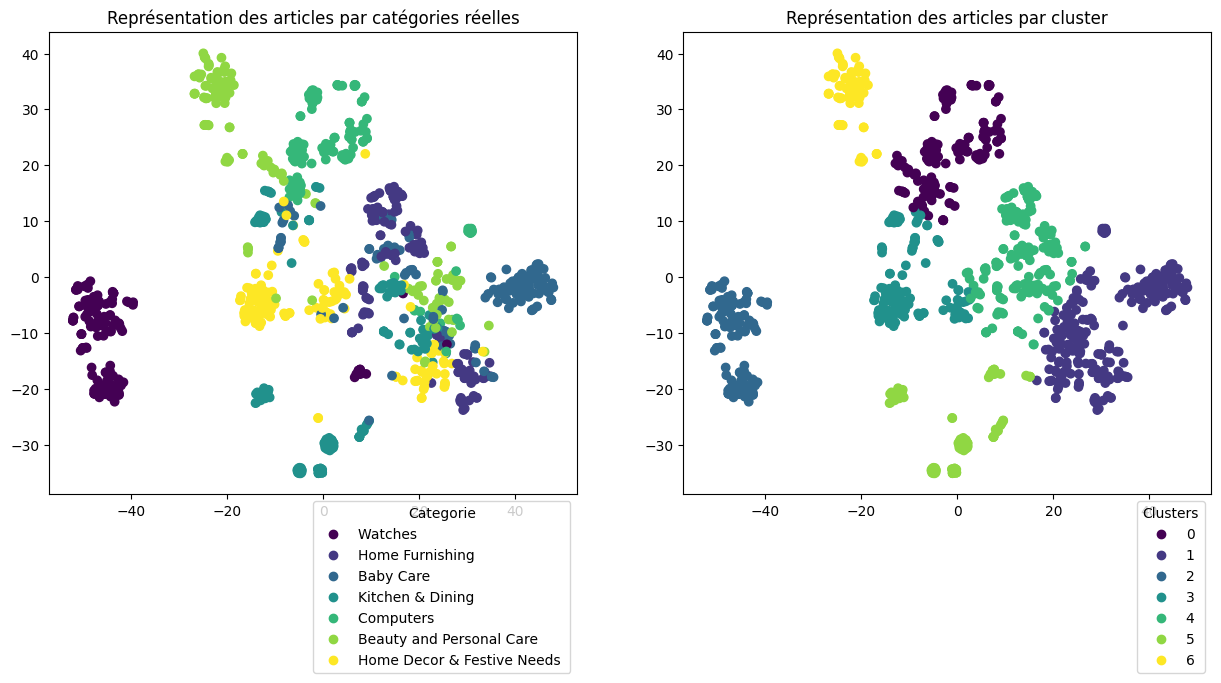

ARI : 0.41871256402859414


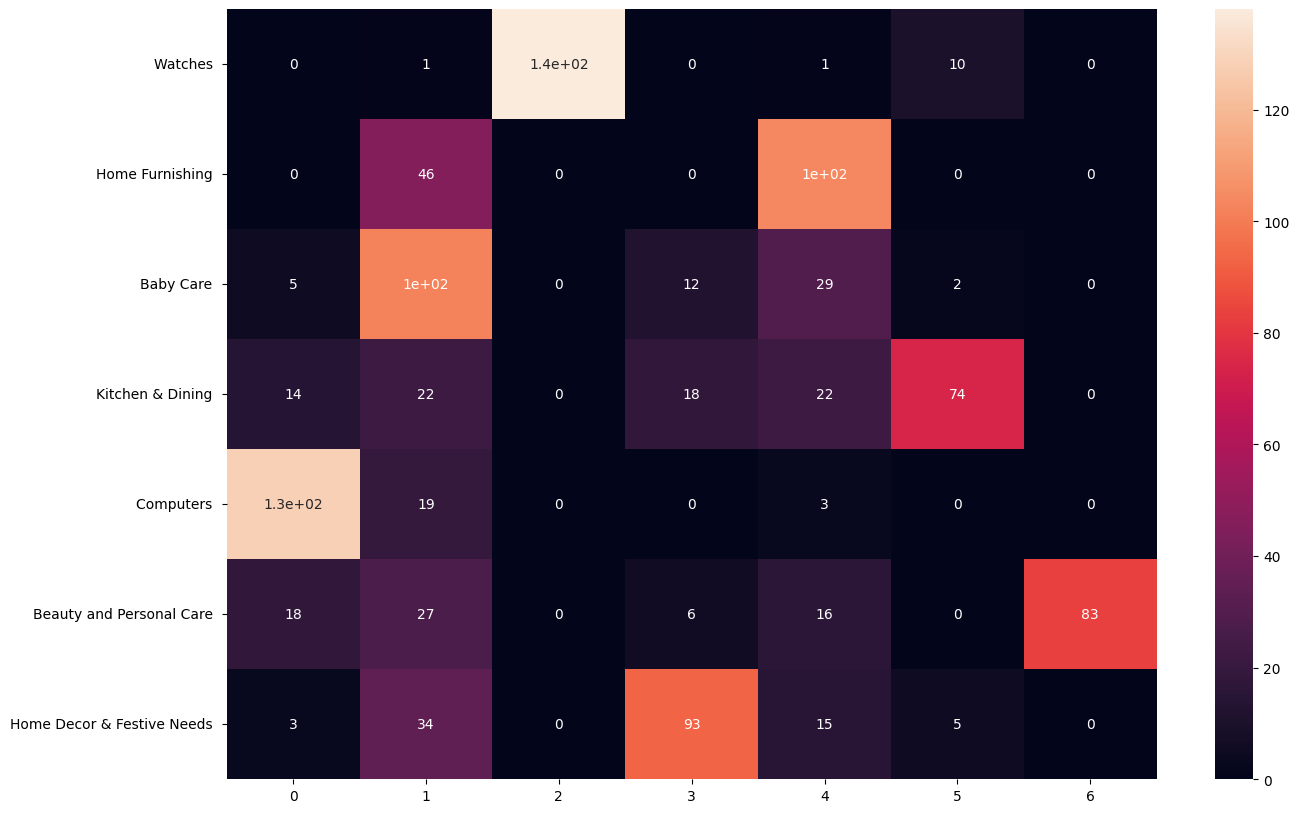

In [27]:
plot_comparatif(embeddings)

# BERT

In [28]:
import os
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

C:\Users\linae\anaconda3\envs\test_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\linae\anaconda3\envs\test_env\Lib\site-packages\transformers\generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(


In [29]:
sentences

[['elegance',
  'polyester',
  'multicolor',
  'abstract',
  'eyelet',
  'door',
  'curtainkey',
  'feature',
  'elegance',
  'polyester',
  'multicolor',
  'abstract',
  'eyelet',
  'door',
  'curtain',
  'floral',
  'curtainelegance',
  'polyester',
  'multicolor',
  'abstract',
  'eyelet',
  'door',
  'curtain',
  'cm',
  'height',
  'pack',
  'price',
  'r',
  'curtain',
  'enhances',
  'look',
  'interiorsthis',
  'curtain',
  'made',
  'high',
  'quality',
  'polyester',
  'fabricit',
  'feature',
  'eyelet',
  'style',
  'stitch',
  'metal',
  'ringit',
  'make',
  'room',
  'environment',
  'romantic',
  'lovingthis',
  'curtain',
  'ant',
  'wrinkle',
  'anti',
  'shrinkage',
  'elegant',
  'apparancegive',
  'home',
  'bright',
  'modernistic',
  'appeal',
  'design',
  'surreal',
  'attention',
  'sure',
  'steal',
  'heart',
  'contemporary',
  'eyelet',
  'valance',
  'curtain',
  'slide',
  'smoothly',
  'draw',
  'apart',
  'first',
  'thing',
  'morning',
  'welcome',
 

In [30]:
def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

In [31]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(" ".join(sent),
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

In [32]:
max_length = 100
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = raw['text_clean'].to_list()

loading configuration file config.json from cache at C:\Users\linae/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.28.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file tf_model.h5 from cache at C:\Users\linae/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb42

In [33]:
features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

loading configuration file config.json from cache at C:\Users\linae/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.28.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file vocab.txt from cache at C:\Users\linae/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\vocab.t

1/1 [==============================] - 1s 1s/step
temps traitement :  170.0


In [34]:
features_bert

array([[ 0.0488923 ,  0.0008261 ,  0.64231455, ..., -0.01843839,
        -0.02231206,  0.05762636],
       [ 0.21222039, -0.05318904,  0.55602056, ..., -0.17595421,
        -0.12045766,  0.13241607],
       [ 0.09340311, -0.09226411,  0.56801885, ..., -0.1808111 ,
        -0.32864612,  0.00952994],
       ...,
       [ 0.07594772, -0.00570856,  0.36068442, ...,  0.14784716,
        -0.12082862, -0.18730088],
       [ 0.14163059, -0.03821794,  0.33230484, ...,  0.21877502,
        -0.17893751, -0.3281343 ],
       [ 0.2605826 , -0.14140931,  0.42055905, ...,  0.15883148,
        -0.14675388, -0.21725541]], dtype=float32)

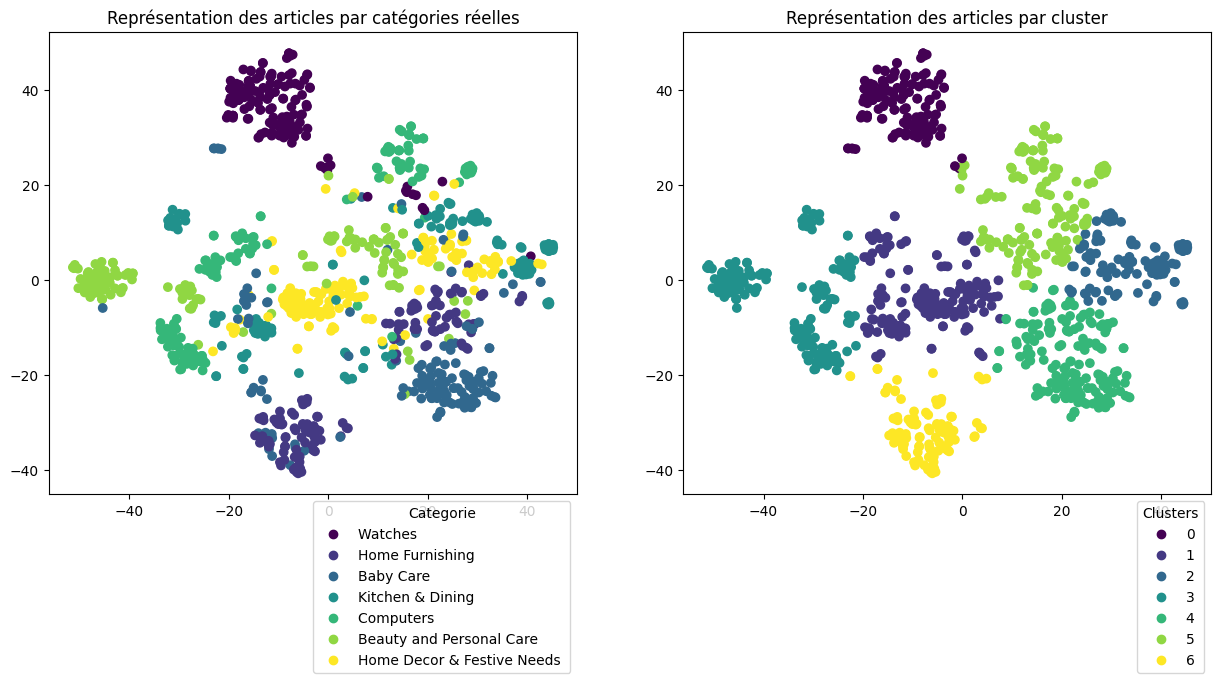

ARI : 0.3414501346256539


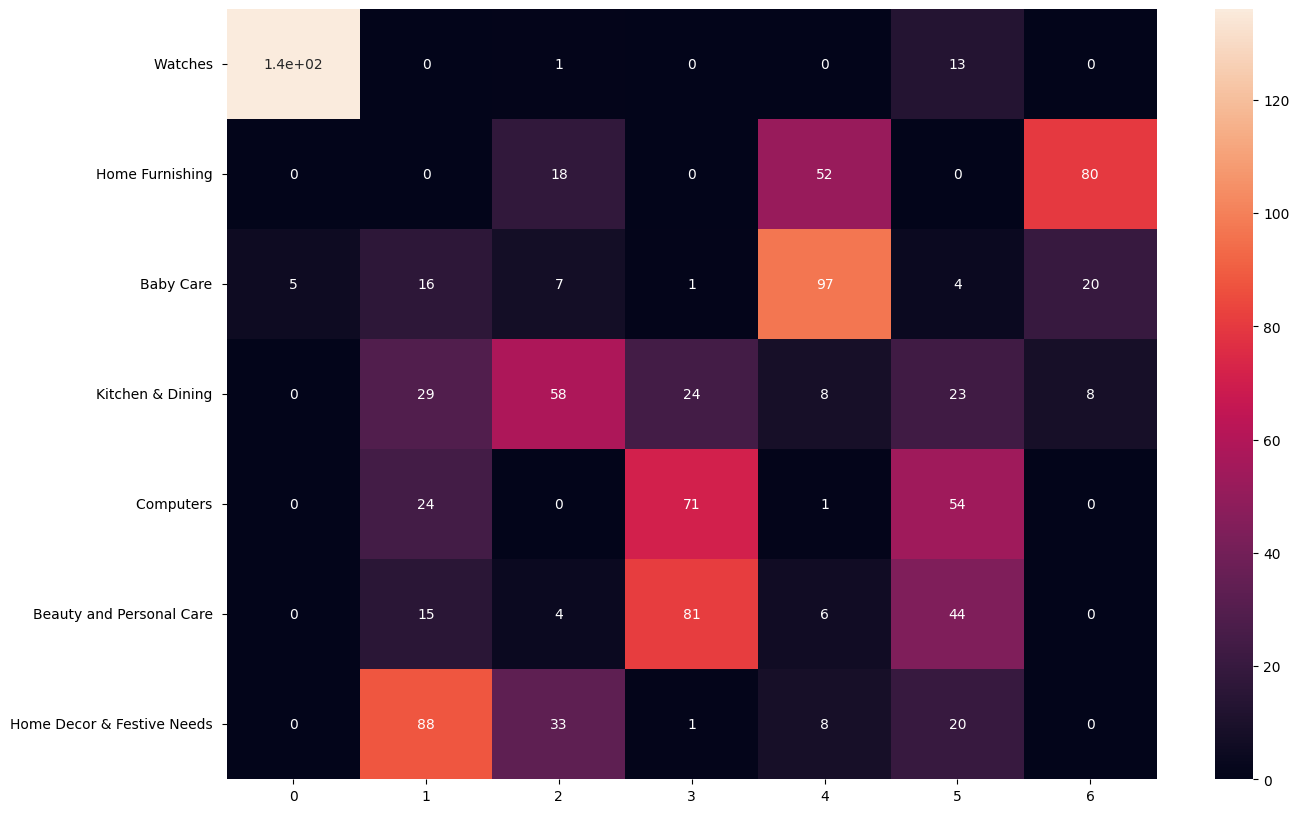

In [35]:
plot_comparatif(features_bert)

# USE

In [37]:
import tensorflow_hub as hub


In [38]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [39]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [40]:
batch_size=10
sentences = raw['text']


features_USE = feature_USE_fct(sentences, batch_size)

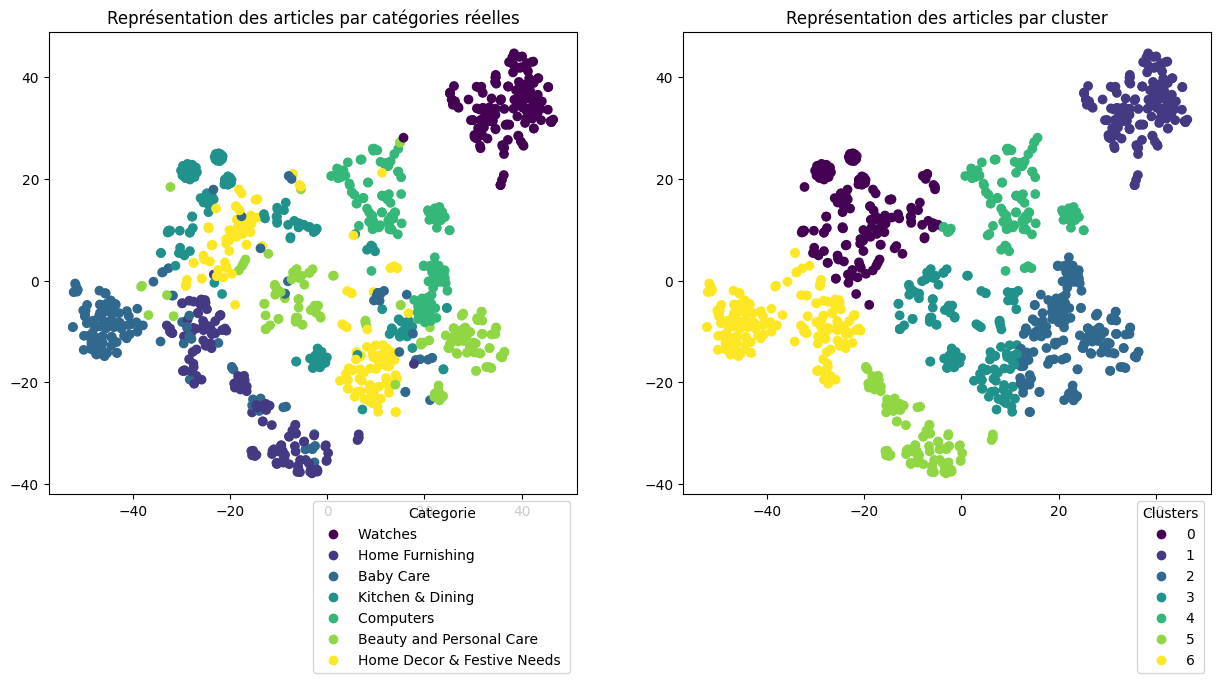

ARI : 0.44202165947894223


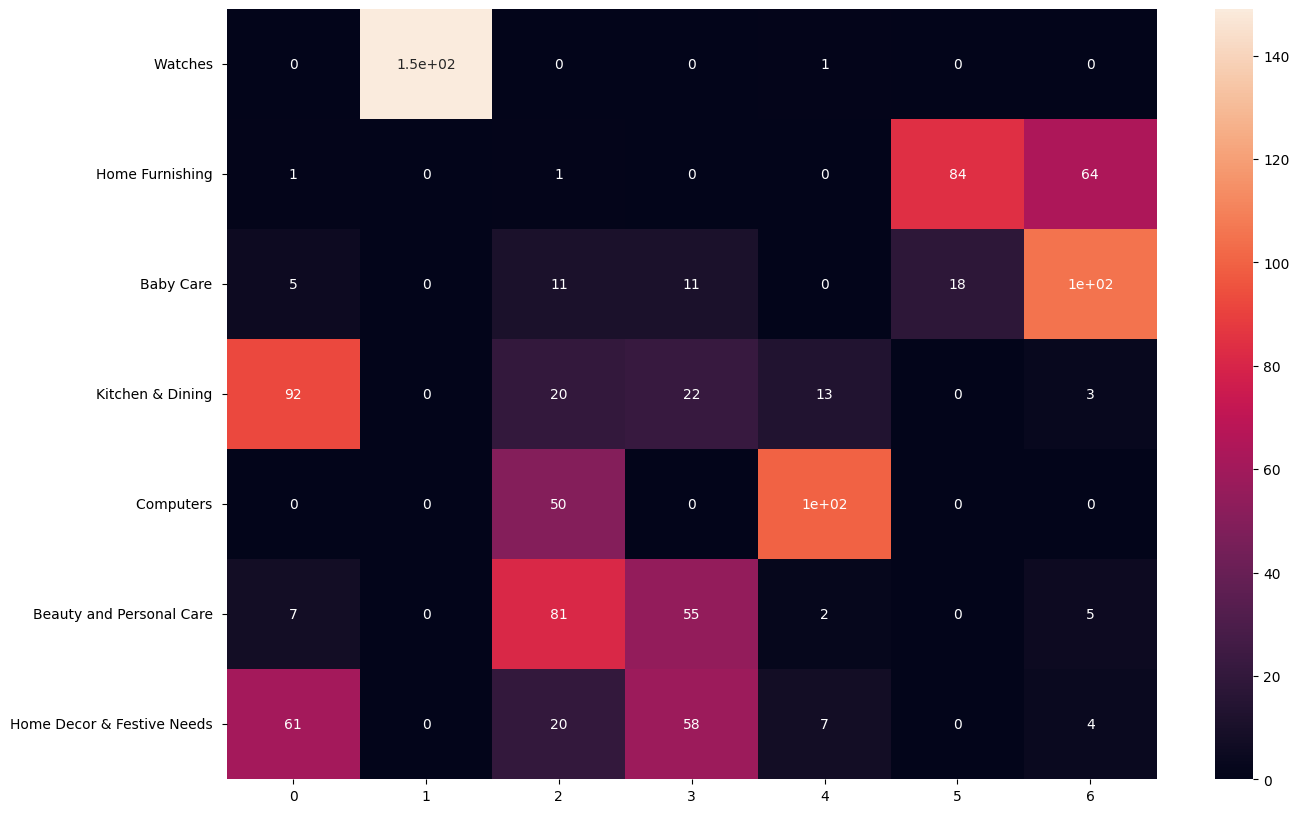

In [41]:
plot_comparatif(features_USE)